In [1]:
import pandas as pd
import geopandas as gpd

In [2]:
# read the csv file downloaded to the local drive
# source: https://chronicdata.cdc.gov/browse?q=PLACES%202022
df_tracks = pd.read_csv('PLACES__Census_Tract_Data__GIS_Friendly_Format___2022_release.csv')

In [3]:
# see the number of rows and columns
df_tracks.shape

(72337, 67)

In [4]:
# see basic info about each column
df_tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72337 entries, 0 to 72336
Data columns (total 67 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   StateAbbr               72337 non-null  object 
 1   StateDesc               72337 non-null  object 
 2   CountyName              72337 non-null  object 
 3   CountyFIPS              72337 non-null  int64  
 4   TractFIPS               72337 non-null  int64  
 5   TotalPopulation         72337 non-null  int64  
 6   ACCESS2_CrudePrev       72337 non-null  float64
 7   ACCESS2_Crude95CI       72337 non-null  object 
 8   ARTHRITIS_CrudePrev     72337 non-null  float64
 9   ARTHRITIS_Crude95CI     72337 non-null  object 
 10  BINGE_CrudePrev         72337 non-null  float64
 11  BINGE_Crude95CI         72337 non-null  object 
 12  BPHIGH_CrudePrev        70338 non-null  float64
 13  BPHIGH_Crude95CI        70338 non-null  object 
 14  BPMED_CrudePrev         70338 non-null

In [5]:
# have a look at the first 5 rows
df_tracks.head()

StateAbbr       StateDesc  CountyName  CountyFIPS    TractFIPS  \
0        NC  North Carolina  Cumberland       37051  37051003402   
1        AZ         Arizona    Maricopa        4013   4013422643   
2        CA      California  Sacramento        6067   6067007402   
3        AL         Alabama     Madison        1089   1089000201   
4        AL         Alabama  Montgomery        1101   1101002202   

   TotalPopulation  ACCESS2_CrudePrev ACCESS2_Crude95CI  ARTHRITIS_CrudePrev  \
0             1947               23.7      (17.9, 28.2)                  4.2   
1             5789               12.5      (10.5, 14.9)                 15.3   
2             6180               14.6      (12.8, 16.5)                 25.6   
3              760               24.7      (20.1, 29.5)                 34.6   
4             1185               25.1      (21.3, 29.2)                 36.2   

  ARTHRITIS_Crude95CI  ...  OBESITY_Crude95CI PHLTH_CrudePrev  \
0        ( 3.7,  4.6)  ...       (21.4, 26.7)             5.0   
1        (14.5, 16.3)  ...       (26.9, 29.8)             7.2   
2        (24.7, 26.5)  ...       (33.7, 35.8)            12.8   
3        (33.1, 36.1)  ...       (49.5, 52.8)            17.7   
4        (34.8, 37.5)  ...       (56.4, 59.2)            16.8   

   PHLTH_Crude95CI SLEEP_CrudePrev  SLEEP_Crude95CI STROKE_CrudePrev  \
0     ( 4.0,  5.6)            35.9     (31.7, 38.9)              0.5   
1     ( 6.4,  8.1)            31.4     (29.8, 32.9)              1.6   
2     (11.9, 13.8)            34.8     (33.7, 35.9)              3.7   
3     (15.9, 19.6)            52.5     (50.8, 54.1)              6.9   
4     (15.3, 18.5)            50.6     (49.2, 51.9)              6.4   

   STROKE_Crude95CI TEETHLOST_CrudePrev  TEETHLOST_Crude95CI  \
0      ( 0.4,  0.6)                 NaN                  NaN   
1      ( 1.5,  1.8)                 8.1         ( 5.2, 12.2)   
2      ( 3.3,  4.0)                16.3         (12.0, 21.6)   
3      ( 6.0,  7.8)                32.4         (22.6, 43.2)   
4      ( 5.7,  7.2)                30.9         (22.9, 38.7)   

                        Geolocation  
0  POINT (-79.02856272 35.15544335)  
1    POINT (-111.61853 33.35726769)  
2   POINT (-121.3791473 38.6869681)  
3  POINT (-86.55005486 34.77465775)  
4  POINT (-86.30555503 32.31774882)  

[5 rows x 67 columns]

In [7]:
# Optional: filter MA out of US dataset
df_ma_tracks = df_tracks[df_tracks['StateAbbr'] == 'MA']

In [8]:
# we can see we've filtered all but 1463 rows
df_ma_tracks.shape

(1463, 67)

In [9]:
df_ma_tracks.head()

StateAbbr      StateDesc CountyName  CountyFIPS    TractFIPS  \
26514        MA  Massachusetts    Norfolk       25021  25021442102   
26515        MA  Massachusetts  Worcester       25027  25027738100   
26517        MA  Massachusetts    Suffolk       25025  25025140102   
26522        MA  Massachusetts   Plymouth       25023  25023510600   
26525        MA  Massachusetts    Suffolk       25025  25025000504   

       TotalPopulation  ACCESS2_CrudePrev ACCESS2_Crude95CI  \
26514             7071                4.6      ( 3.4,  6.0)   
26515             4636                5.4      ( 4.3,  6.9)   
26517             4401                8.5      ( 7.2, 10.0)   
26522             2857                6.8      ( 5.7,  8.1)   
26525             4985                5.9      ( 4.3,  8.8)   

       ARTHRITIS_CrudePrev ARTHRITIS_Crude95CI  ...  OBESITY_Crude95CI  \
26514                 21.5        (20.1, 23.3)  ...       (22.6, 25.9)   
26515                 20.6        (19.5, 21.8)  ...       (25.1, 27.8)   
26517                 20.7        (19.7, 21.6)  ...       (23.1, 24.9)   
26522                 27.2        (25.8, 28.6)  ...       (22.7, 25.0)   
26525                 14.8        (14.0, 15.7)  ...       (15.3, 18.0)   

      PHLTH_CrudePrev  PHLTH_Crude95CI SLEEP_CrudePrev  SLEEP_Crude95CI  \
26514             7.0     ( 6.0,  8.2)            28.8     (26.9, 30.8)   
26515             6.5     ( 5.7,  7.4)            32.1     (30.5, 33.7)   
26517             8.1     ( 7.3,  8.9)            34.0     (32.8, 35.2)   
26522             8.9     ( 7.9,  9.9)            33.0     (31.5, 34.3)   
26525             6.0     ( 5.2,  7.1)            27.9     (26.0, 30.1)   

      STROKE_CrudePrev  STROKE_Crude95CI TEETHLOST_CrudePrev  \
26514              2.0      ( 1.7,  2.3)                 8.0   
26515              1.8      ( 1.5,  2.0)                 8.8   
26517              2.6      ( 2.4,  2.9)                11.8   
26522              3.0      ( 2.6,  3.5)                10.4   
26525              1.9      ( 1.6,  2.4)                10.1   

       TEETHLOST_Crude95CI                       Geolocation  
26514         ( 4.2, 13.2)  POINT (-71.42992478 42.08761238)  
26515         ( 5.0, 14.6)  POINT (-71.68171716 42.17576754)  
26517         ( 8.0, 16.4)   POINT (-71.13790391 42.2458091)  
26522         ( 6.2, 16.3)  POINT (-71.06083413 42.07961732)  
26525         ( 5.9, 19.2)  POINT (-71.14382639 42.34146271)  

[5 rows x 67 columns]

In [10]:
# read in a shapefile for census tracks
# source: https://www.census.gov/geographies/mapping-files/time-series/geo/carto-boundary-file.html
gdf_tracks = gpd.read_file('cb_2018_25_tract_500k/cb_2018_25_tract_500k.shp')

In [11]:
# have a look at the columns, we see GEOID is object where TrackFIPS above is int64
gdf_tracks.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1475 entries, 0 to 1474
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   STATEFP   1475 non-null   object  
 1   COUNTYFP  1475 non-null   object  
 2   TRACTCE   1475 non-null   object  
 3   AFFGEOID  1475 non-null   object  
 4   GEOID     1475 non-null   object  
 5   NAME      1475 non-null   object  
 6   LSAD      1475 non-null   object  
 7   ALAND     1475 non-null   int64   
 8   AWATER    1475 non-null   int64   
 9   geometry  1475 non-null   geometry
dtypes: geometry(1), int64(2), object(7)
memory usage: 115.4+ KB


In [23]:
# convert the data type from object to int64 for the merge
gdf_tracks['GEOID'] = gdf_tracks['GEOID'].astype('int64')
gdf_tracks_merged = gdf_tracks.merge(df_tracks, left_on='GEOID', right_on='TractFIPS')

<Axes: >

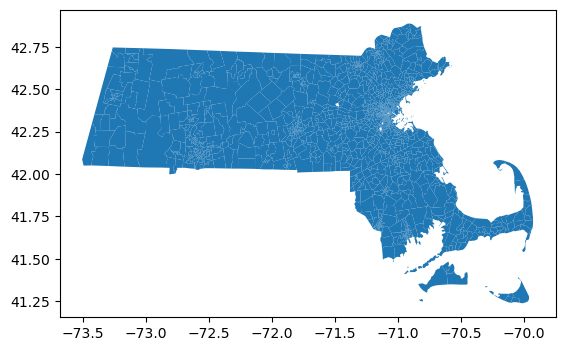

In [24]:
# plot the geodataframe
gdf_tracks_merged.plot()

In [27]:
# plot map using Folium (a dependency of geopandas)
gdf_tracks_merged.explore(
    column="DEPRESSION_CrudePrev",
    tiles="CartoDB positron",
    scheme="naturalbreaks",
    legend=True,
    k=9,
    legend_kwds=dict(colorbar=False)
)

In [20]:
# verify and inspect merge
gdf_tracks_merged.head()

STATEFP COUNTYFP TRACTCE     AFFGEOID        GEOID     NAME LSAD    ALAND  \
0      25      009  202102  25009202102  25009202102  2021.02   CT  2919051   
1      25      009  205100  25009205100  25009205100     2051   CT  1826284   
2      25      017  339400  25017339400  25017339400     3394   CT   629016   
3      25      017  342101  25017342101  25017342101  3421.01   CT   617841   
4      25      017  351000  25017351000  25017351000     3510   CT   668312   

   AWATER                                           geometry  ...  \
0   24048  POLYGON ((-70.93411 42.49083, -70.91355 42.485...  ...   
1   92857  POLYGON ((-70.95086 42.49498, -70.94992 42.494...  ...   
2   25734  POLYGON ((-71.12992 42.41333, -71.12699 42.416...  ...   
3       0  POLYGON ((-71.04568 42.40992, -71.04567 42.412...  ...   
4       0  POLYGON ((-71.11816 42.38802, -71.11745 42.388...  ...   

  OBESITY_Crude95CI PHLTH_CrudePrev PHLTH_Crude95CI  SLEEP_CrudePrev  \
0      (22.7, 25.5)             8.1    ( 7.1,  9.2)             27.4   
1      (25.3, 27.1)             9.1    ( 8.4,  9.9)             30.3   
2      (21.4, 23.8)             7.5    ( 6.6,  8.4)             29.1   
3      (25.5, 27.2)            10.1    ( 9.2, 10.9)             32.7   
4      (16.8, 18.6)             4.0    ( 3.7,  4.5)             26.2   

   SLEEP_Crude95CI  STROKE_CrudePrev  STROKE_Crude95CI TEETHLOST_CrudePrev  \
0     (25.9, 29.0)               2.7      ( 2.3,  3.2)                 8.8   
1     (29.4, 31.3)               2.7      ( 2.4,  3.0)                12.4   
2     (27.6, 30.6)               2.2      ( 2.0,  2.6)                11.1   
3     (31.7, 33.7)               3.1      ( 2.8,  3.4)                16.6   
4     (25.2, 27.5)               1.0      ( 0.9,  1.1)                 5.3   

   TEETHLOST_Crude95CI                       Geolocation  
0         ( 4.8, 14.7)  POINT (-70.91886201 42.48104087)  
1         ( 8.7, 16.7)  POINT (-70.94192746 42.48670505)  
2         ( 6.6, 16.6)   POINT (-71.1236353 42.41490325)  
3         (10.9, 23.1)  POINT (-71.03951786 42.41095298)  
4         ( 3.7,  8.8)   POINT (-71.11280928 42.3890914)  

[5 rows x 77 columns]

In [15]:
# write file as GeoJSON to disk
gdf_tracks_merged.to_file('ma-merged-tracks.json', driver='GeoJSON')

<Axes: >

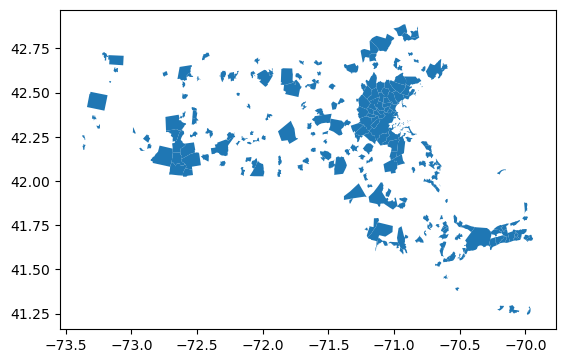

In [30]:
# repeate process for places
df_places = pd.read_csv('PLACES__Place_Data__GIS_Friendly_Format___2022_release.csv')
gdf_places = gpd.read_file('cb_2018_25_place_500k/cb_2018_25_place_500k.shp')
gdf_places['GEOID'] = gdf_places['GEOID'].astype('int64')
gdf_places_merged = gdf_places.merge(df_places, left_on='GEOID', right_on='PlaceFIPS')
gdf_places_merged.plot()

In [32]:
gdf_places_merged.explore(
    column="DEPRESSION_CrudePrev",
    tiles="CartoDB positron",
    scheme="naturalbreaks",
    legend=True,
    k=9,
    legend_kwds=dict(colorbar=False)
)

In [31]:
gdf_places_merged.to_file('ma-merged-places.json', driver='GeoJSON')